In [0]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Conv2DTranspose, Flatten, Reshape, BatchNormalization
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l1

import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
import tensorflow as tf
from keras.datasets import mnist

In [0]:
#download mnist data and split into train and test sets
(x_train, _), (x_test, _) = mnist.load_data()                                                     # Load data

#keras.backend.image_data_format return 2 input types: channel_first and channel_last
img_rows=28
img_cols=28

if K.image_data_format() == 'channels_first':                                                       # if the input is channel_first
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, 28, 28)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (28, 28, 1)

x_train = x_train.astype('float32')                                                                 # Standardization
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
# Convolutional autoencoder model

x = Input((28, 28,1))

                                                                      # Encoder
e = Conv2D(32, (3, 3), activation='relu')(x)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
l = Flatten()(e)
l = Dense(49, activation='softmax')(l)

encoder = Model(input=x, output=l)                                    # for latent representation
encoded_imgs = encoder.predict(x_train)

                                                                      # Decoder
d = Reshape((7,7,1))(l)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)

autoencoder = Model(input=x, output=decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train,x_train,batch_size=64, nb_epoch=5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  del sys.path[0]




Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/5
60000/60000 [==============================] - 10s 173us/step - loss: 0.0191
Epoch 2/5
60000/60000 [==============================] - 9s 156us/step - loss: 0.0103
Epoch 3/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.0090
Epoch 4/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.0083
Epoch 5/5
60000/60000 [==============================] - 10s 160us/step - loss: 0.0078


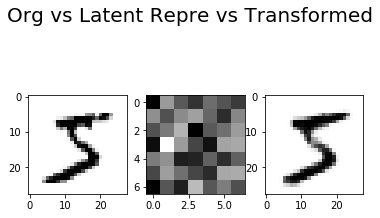

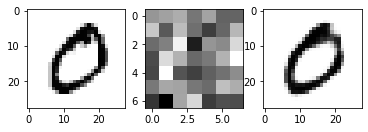

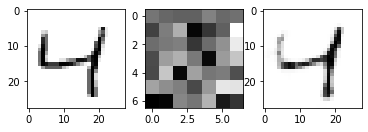

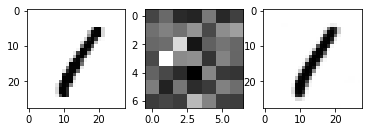

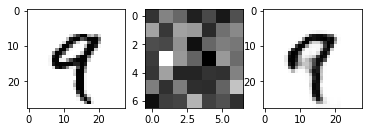

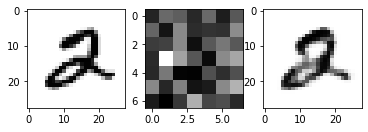

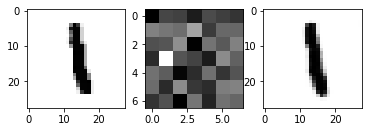

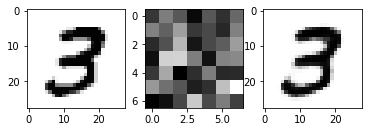

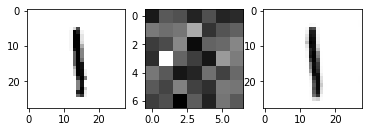

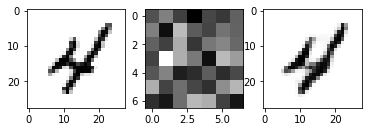

In [22]:
x_pred = autoencoder.predict(x_train)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Org vs Latent Repre vs Transformed', fontsize=20)

for i in range(10):
  plt.subplot(1,3,1), plt.imshow(x_train[i].reshape(28,28), cmap='Greys')
  plt.subplot(1,3,2), plt.imshow(encoded_imgs[i].reshape(7,7), 'gray')
  plt.subplot(1,3,3), plt.imshow(x_pred[i].reshape(28,28), cmap='Greys')
  plt.show()